<a href="https://colab.research.google.com/github/vikpy/AISem3/blob/master/CW/Informed_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Uniform Cost Search and A* for searching agents

## In AI, a problem is usually defined as a quadruplet {Initial state, Goal, Cost Function, and possible actions)

In [ ]:
class Problem:
    def __init__(self, initial_state,goal,cost,actions):
        self.initial_state=initial_state
        self.goal=goal
        self.cost=cost
        self.actions=actions

A state of a problem is its current distance from the start and solution of the problem. It is identified by a unique comparable element that could be in our case, a city. And the cost is the cumulative cost to get to that state/city.

In [ ]:
class StateWithCumulativeCost:
    def __init__(self, comparable, cost):
        self.comparable=comparable
        self.cost=cost

# To solve the Romanian navigation problem proposed in the booked entitled Artificial Intelligence: A modern apprach (AIMA)

## We need to define :
* an intial state,
* a goaltest/state, 
* a cost function 
* and a list of possible actions



We first define a city. A city is identified by a unique name, and it also knows its neighbouring cities.
This definition allows us to define any city, whether it be a starting city (initial state), or the final city (goal state)

In [ ]:
class CityState:
    def __init__(self, city_name, city_neighbours):
        self.city_name=city_name
        self.city_neighbours=city_neighbours

The cost function, neighbouring cities, and the list of actions from a city are very entertwined.
* The cost function takes a start state (A), a destination state (B) and a mapper (M) and returns how much it would cost to go from A, to B based on a premade rule stored in M: M(A,B)=> cost
* However this does not justify which As can go to which Bs. The actions function uses the neighbour variable found in each CityState object to return the list of neighbours to the cost function

In [ ]:
class Cost:
    def __init__(self, mapper):
        self.mapper=mapper
    def cost(self,start, destination):
        return self.mapper[(start, destination)]

    
class Actions:
    def __init__(self, lookup, cities):
        self.lookup=lookup
        self.cities=cities
        
    def getActions(self,city):
        possible_actions=[]
        for n in city.city_neighbours:
            possible_actions.append(self.lookup(n, self.cities))
        return possible_actions

def lookup(name, cities):
    for c in cities:
        if name==c.city_name:
            return c
    return None

Goal test definition. We would like to get a to a city

In [ ]:
class Goal:
    def __init__(self, goal):
        self.goal=goal
    def goalTest(self, current):
        if(self.goal == current):
            return True
        else:
            return False

## To make ideas more concrete, let's define our graph

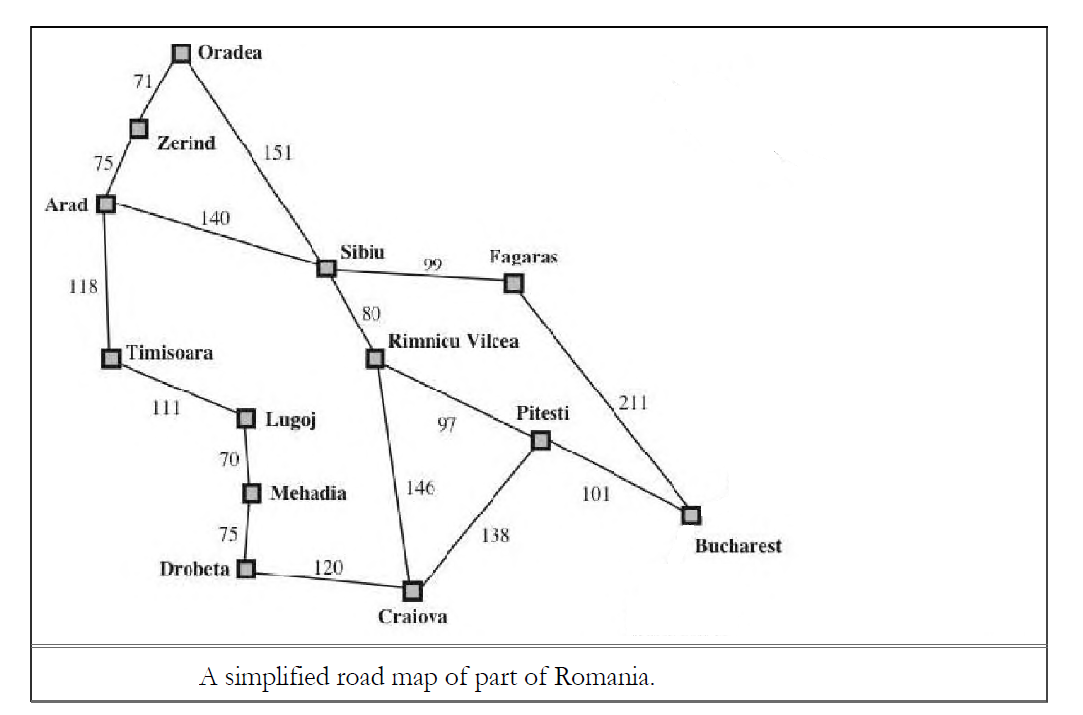

In [ ]:
from IPython.display import Image
Image(filename="Romania.png")

Image adapted from Artificial Intelligence: A modern approach (3rd edition), by Stuart Russel and Peter Norvig

In [ ]:
oradea= CityState("Oradea",["Zerind","Sibiu"])
zerind= CityState("Zerind",["Oradea","Arad"])
arad= CityState("Arad",["Zerind","Sibiu","Timisoara"])
timisoara= CityState("Timisoara",["Arad","Lugoj"])
lugoj= CityState("Lugoj",["Timisoara","Mehadia"])
sibiu= CityState("Sibiu",["Arad","Fagaras","Rimnicu Vilcea"])
mehadia=CityState("Mehadia",["Lugoj","Drobeta"])
drobeta=CityState("Drobeta",["Mehadia","Craiova"])
craiova=CityState("Craiova",["Drobeta","Rimnicu Vilcea","Pitesti"])
rimnicu=CityState("Rimnicu Vilcea",["Sibiu","Craiova","Pitesti"])
fagaras=CityState("Fagaras",["Sibiu","Bucharest"])
pitesti=CityState("Pitesti",["Rimnicu Vilcea","Bucharest","Craiova"])
bucharest=CityState("Bucharest",["Pitesti","Fagaras"])

cities=[oradea,zerind,arad,timisoara,lugoj,sibiu,mehadia,drobeta,craiova,rimnicu,fagaras,pitesti,bucharest]

## Now let's define the cost of going from a city to its neigbouring city as specified on the image

In [ ]:
from collections import defaultdict
mapper = defaultdict(lambda: defaultdict(lambda: 0.0))
mapper[(oradea,zerind)]=71
mapper[(zerind,oradea)]=71
mapper[(oradea,sibiu)]=151
mapper[(sibiu,oradea)]=151
mapper[(zerind,arad)]=75
mapper[(arad,zerind)]=75
mapper[(sibiu,arad)]=140
mapper[(arad,sibiu)]=140
mapper[(arad,timisoara)]=118
mapper[(timisoara,arad)]=118
mapper[(sibiu,fagaras)]=99
mapper[(fagaras,sibiu)]=99
mapper[(timisoara,lugoj)]=111
mapper[(lugoj,timisoara)]=111
mapper[(lugoj,mehadia)]=70
mapper[(mehadia,lugoj)]=70
mapper[(mehadia,drobeta)]=75
mapper[(drobeta,mehadia)]=75
mapper[(drobeta,craiova)]=120
mapper[(craiova,drobeta)]=120
mapper[(craiova,rimnicu)]=146
mapper[(rimnicu,craiova)]=146
mapper[(rimnicu,sibiu)]=80
mapper[(sibiu,rimnicu)]=80
mapper[(craiova,pitesti)]=138
mapper[(pitesti,craiova)]=138
mapper[(pitesti,rimnicu)]=97
mapper[(rimnicu,pitesti)]=97
mapper[(fagaras,bucharest)]=211
mapper[(bucharest,fagaras)]=211
mapper[(pitesti,bucharest)]=101
mapper[(bucharest,pitesti)]=101

## PriorityQueue is needed to decide which paths to explore first based on lowest cost

In [ ]:
class PriorityQueue(object): 
    def __init__(self): 
        self.queue = [] 
  
    def __str__(self): 
        return ' '.join([str(i) for i in self.queue]) 
  
    def isEmpty(self): 
        return len(self.queue) == [] 
    
    def insert(self, data):
        self.queue.append(data) 
  
    def delete(self): 
        try: 
            min = 0
            for i in range(len(self.queue)): 
                if (self.queue[i][-1]).cost < (self.queue[min][-1]).cost: 
                    min = i 
            item = self.queue[min] 
            del self.queue[min] 
            return item 
        except IndexError: 
            print() 
            exit() 
  


# UCS implementation

In [ ]:
def ucs(problem):
    node = StateWithCumulativeCost(problem.initial_state,0)
    q = PriorityQueue()
    q.insert([node])
    while True:
        if(q.isEmpty()):
            return None
        path=q.delete()
        node=path[-1]
        if(problem.goal.goalTest(node.comparable)):
            return path
        for child in problem.actions.getActions(node.comparable):
            child_node = StateWithCumulativeCost(child,node.cost+problem.cost.cost(node.comparable,child))
            if(child_node not in path):
                new_path=list(path)
                new_path.append(child_node)
                q.insert(new_path)
    

# Problem definition and result

In [ ]:
problem = Problem(oradea, Goal(bucharest),Cost(mapper),Actions(lookup,cities))
result=ucs(problem)

In [ ]:
for r in result:
    print(r.comparable.city_name, r.cost)

Oradea 0
Sibiu 151
Rimnicu Vilcea 231
Pitesti 328
Bucharest 429


# Implementing A* only requires us to add a heuristic measure in addition to the real cost. A heuristic measure is a "guess" of the cost from the current state to the goal state.

In [ ]:
class Heuristics:
    def __init__(self, heuristics):
        self.heuristics=heuristics
    def getHeuristic(self, start, goal):
        return self.heuristics[(start,goal)]

heu = defaultdict(lambda: defaultdict(lambda: 0.0))
heu[(oradea,bucharest)]=300
heu[(zerind,bucharest)]=295
heu[(sibiu,bucharest)]=200
heu[(arad,bucharest)]=250
heu[(timisoara,bucharest)]=250
heu[(fagaras,bucharest)]=150
heu[(lugoj,bucharest)]=150
heu[(mehadia,bucharest)]=140
heu[(drobeta,bucharest)]=130
heu[(craiova,bucharest)]=120
heu[(rimnicu,bucharest)]=100
heu[(pitesti,bucharest)]=70
heu[(bucharest,bucharest)]=0

In [ ]:
def Astar(problem, heuristics):
    node = StateWithCumulativeCost(problem.initial_state,0)
    q = PriorityQueue()
    q.insert([node])
    while True:
        if(q.isEmpty()):
            return None
        path=q.delete()
        node=path[-1]
        if(problem.goal.goalTest(node.comparable)):
            return path
        for child in problem.actions.getActions(node.comparable):
            #print(heuristics[(child, problem.goal.goal)])
            child_node = StateWithCumulativeCost(child,node.cost+problem.cost.cost(node.comparable,child)+heuristics.getHeuristic(child, problem.goal.goal))
            if(child_node not in path):
                new_path=list(path)
                new_path.append(child_node)
                q.insert(new_path)
    

In [ ]:
result=Astar(problem,Heuristics(heu))

In [ ]:
for r in result:
    print(r.comparable.city_name, r.cost)

Oradea 0
Sibiu 351
Rimnicu Vilcea 531
Pitesti 698
Bucharest 799
